In [68]:
# Import packages
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import socket 

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [69]:
%load_ext dotenv
%dotenv ../.env

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [70]:
con = create_engine(os.getenv('BUILD_ENGINE').replace('localhost', os.getenv('IP')))

In [71]:
# Specify latest PLUTO version
pluto = 'pluto'
# Specify previous PLUTO version or the one you want to compare to
plutoprev = 'dcp_pluto'

In [105]:
sql = '''
SELECT
    count(*) as total,
    sum(case when borough is null then 1 else 0 end) as borough,
    sum(case when block is null then 1 else 0 end) as block,
    sum(case when lot is null then 1 else 0 end) as lot,
    sum(case when cd is null then 1 else 0 end) as cd,
    sum(case when ct2010 is null then 1 else 0 end) as ct2010,
    sum(case when cb2010 is null then 1 else 0 end) as cb2010,
    sum(case when schooldist is null then 1 else 0 end) as schooldist,
    sum(case when council is null then 1 else 0 end) as council,
    sum(case when zipcode is null then 1 else 0 end) as zipcode,
    sum(case when firecomp is null then 1 else 0 end) as firecomp,
    sum(case when policeprct is null then 1 else 0 end) as policeprct,
    sum(case when healtharea is null then 1 else 0 end) as healtharea,
    sum(case when sanitboro is null then 1 else 0 end) as sanitboro,
    sum(case when sanitsub is null then 1 else 0 end) as sanitsub,
    sum(case when address is null then 1 else 0 end) as address,
    sum(case when zonedist1 is null then 1 else 0 end) as zonedist1,
    sum(case when zonedist2 is null then 1 else 0 end) as zonedist2,
    sum(case when zonedist3 is null then 1 else 0 end) as zonedist3,
    sum(case when zonedist4 is null then 1 else 0 end) as zonedist4,
    sum(case when overlay1 is null then 1 else 0 end) as overlay1,
    sum(case when overlay2 is null then 1 else 0 end) as overlay2,
    sum(case when spdist1 is null then 1 else 0 end) as spdist1,
    sum(case when spdist2 is null then 1 else 0 end) as spdist2,
    sum(case when spdist3 is null then 1 else 0 end) as spdist3,
    sum(case when ltdheight is null then 1 else 0 end) as ltdheight,
    sum(case when splitzone is null then 1 else 0 end) as splitzone,
    sum(case when bldgclass is null then 1 else 0 end) as bldgclass,
    sum(case when landuse is null then 1 else 0 end) as landuse,
    sum(case when easements is null then 1 else 0 end) as easements,
    sum(case when ownertype is null then 1 else 0 end) as ownertype,
    sum(case when ownername is null then 1 else 0 end) as ownername,
    sum(case when lotarea is null then 1 else 0 end) as lotarea,
    sum(case when bldgarea is null then 1 else 0 end) as bldgarea,
    sum(case when comarea is null then 1 else 0 end) as comarea,
    sum(case when resarea is null then 1 else 0 end) as resarea,
    sum(case when officearea is null then 1 else 0 end) as officearea,
    sum(case when retailarea is null then 1 else 0 end) as retailarea,
    sum(case when garagearea is null then 1 else 0 end) as garagearea,
    sum(case when strgearea is null then 1 else 0 end) as strgearea,
    sum(case when factryarea is null then 1 else 0 end) as factryarea,
    sum(case when otherarea is null then 1 else 0 end) as otherarea,
    sum(case when areasource is null then 1 else 0 end) as areasource,
    sum(case when numbldgs is null then 1 else 0 end) as numbldgs,
    sum(case when numfloors is null then 1 else 0 end) as numfloors,
    sum(case when unitsres is null then 1 else 0 end) as unitsres,
    sum(case when unitstotal is null then 1 else 0 end) as unitstotal,
    sum(case when lotfront is null then 1 else 0 end) as lotfront,
    sum(case when lotdepth is null then 1 else 0 end) as lotdepth,
    sum(case when bldgfront is null then 1 else 0 end) as bldgfront,
    sum(case when bldgdepth is null then 1 else 0 end) as bldgdepth,
    sum(case when ext is null then 1 else 0 end) as ext,
    sum(case when proxcode is null then 1 else 0 end) as proxcode,
    sum(case when irrlotcode is null then 1 else 0 end) as irrlotcode,
    sum(case when lottype is null then 1 else 0 end) as lottype,
    sum(case when bsmtcode is null then 1 else 0 end) as bsmtcode,
    sum(case when assessland is null then 1 else 0 end) as assessland,
    sum(case when assesstot is null then 1 else 0 end) as assesstot,
    sum(case when exempttot is null then 1 else 0 end) as exempttot,
    sum(case when yearbuilt is null then 1 else 0 end) as yearbuilt,
    sum(case when yearalter1 is null then 1 else 0 end) as yearalter1,
    sum(case when yearalter2 is null then 1 else 0 end) as yearalter2,
    sum(case when histdist is null then 1 else 0 end) as histdist,
    sum(case when landmark is null then 1 else 0 end) as landmark,
    sum(case when builtfar is null then 1 else 0 end) as builtfar,
    sum(case when residfar is null then 1 else 0 end) as residfar,
    sum(case when commfar is null then 1 else 0 end) as commfar,
    sum(case when facilfar is null then 1 else 0 end) as facilfar,
    sum(case when borocode is null then 1 else 0 end) as borocode,
    sum(case when bbl is null then 1 else 0 end) as bbl,
    sum(case when condono is null then 1 else 0 end) as condono,
    sum(case when tract2010 is null then 1 else 0 end) as tract2010,
    sum(case when xcoord is null then 1 else 0 end) as xcoord,
    sum(case when ycoord is null then 1 else 0 end) as ycoord,
    sum(case when zonemap is null then 1 else 0 end) as zonemap,
    sum(case when zmcode is null then 1 else 0 end) as zmcode,
    sum(case when sanborn is null then 1 else 0 end) as sanborn,
    sum(case when taxmap is null then 1 else 0 end) as taxmap,
    sum(case when edesignum is null then 1 else 0 end) as edesignum,
    sum(case when appbbl is null then 1 else 0 end) as appbbl,
    sum(case when appdate is null then 1 else 0 end) as appdate,
    sum(case when plutomapid is null then 1 else 0 end) as plutomapid,
    sum(case when version is null then 1 else 0 end) as version,
    sum(case when sanitdistrict is null then 1 else 0 end) as sanitdistrict,
    sum(case when healthcenterdistrict is null then 1 else 0 end) as healthcenterdistrict,
    sum(case when firm07_flag is null then 1 else 0 end) as firm07_flag,
    sum(case when pfirm15_flag is null then 1 else 0 end) as pfirm15_flag,
    sum(case when rpaddate is null then 1 else 0 end) as rpaddate,
    sum(case when dcasdate is null then 1 else 0 end) as dcasdate,
    sum(case when zoningdate is null then 1 else 0 end) as zoningdate,
    sum(case when landmkdate is null then 1 else 0 end) as landmkdate,
    sum(case when basempdate is null then 1 else 0 end) as basempdate,
    sum(case when masdate is null then 1 else 0 end) as masdate,
    sum(case when polidate is null then 1 else 0 end) as polidate,
    sum(case when edesigdate is null then 1 else 0 end) as edesigdate
FROM {}
'''

In [106]:
df = pd.read_sql(sql=sql.format(pluto), con=con)
df_prev = pd.read_sql(sql=sql.format(plutoprev), con=con)

In [107]:
df

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,859602,0,0,0,1630,720,1630,2348,1631,2225,2368,2355,2354,2550,2670,616,2866,839792,859398,859589,784843,859436,757923,859523,859602,856566,2866,616,3125,616,828559,1716,1694,634,48964,48964,48964,48964,48964,48964,48964,48964,616,1694,1694,616,616,1694,1694,1694,1694,58812,616,616,616,616,616,616,616,616,616,616,828709,858162,4374,616,616,616,0,0,851128,720,1767,1767,2711,843981,1528,1528,859602,767859,767859,0,0,2550,2354,824921,793907,0,0,0,0,0,859602,859602,0


In [108]:
df_prev

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,859459,0,0,0,1487,577,1487,2205,1488,20938,2225,2212,2211,2407,2527,473,2543,839637,859255,859446,784664,859293,757743,859381,859459,856423,2543,473,2924,473,828416,1573,1551,491,48821,48821,48821,48821,48821,48821,48821,48821,473,1551,1551,473,473,1551,1551,1551,1551,58669,473,473,473,473,473,473,473,473,473,473,828566,858019,4224,473,473,473,0,0,850985,577,1624,1624,2388,843835,1385,1385,850095,767716,767716,0,0,2407,2211,824764,793747,0,0,0,0,0,859459,859459,0


In [113]:
for i in df_prev.columns: 
    df_prev[i] = df_prev[i]/df_prev['total']
    
for i in df.columns: 
    df[i] = df[i]/df['total']

In [114]:
summary = pd.concat([df_prev,df], sort=False)
summary.index = ['19v1', '19v2_beta']
summary_pct = summary.iloc[:, :-1].pct_change()

In [115]:
summary_pct

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate
19v1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19v2_beta,0.0,NaN,NaN,NaN,0.096167,0.247834,0.096167,0.064853,0.096102,-0.893734,0.06427,0.064647,0.064677,0.05941,0.056589,0.302326,0.127015,0.000185,0.000166,0.000166,0.000228,0.000166,0.000238,0.000165,0.000166,0.000167,0.127015,0.302326,0.068741,0.302326,0.000173,0.090909,0.092199,0.291242,0.002929,0.002929,0.002929,0.002929,0.002929,0.002929,0.002929,0.002929,0.302326,0.092199,0.092199,0.302326,0.302326,0.092199,0.092199,0.092199,0.092199,0.002437,0.302326,0.302326,0.302326,0.302326,0.302326,0.302326,0.302326,0.302326,0.302326,0.302326,0.000173,0.000167,0.035511,0.302326,0.302326,0.302326,NaN,NaN,0.000168,0.247834,0.088054,0.088054,0.13526,0.000173,0.103249,0.103249,0.011183,0.000186,0.000186,NaN,NaN,0.05941,0.064677,0.00019,0.000202,NaN,NaN,NaN,NaN,NaN,0.000166,0.000166


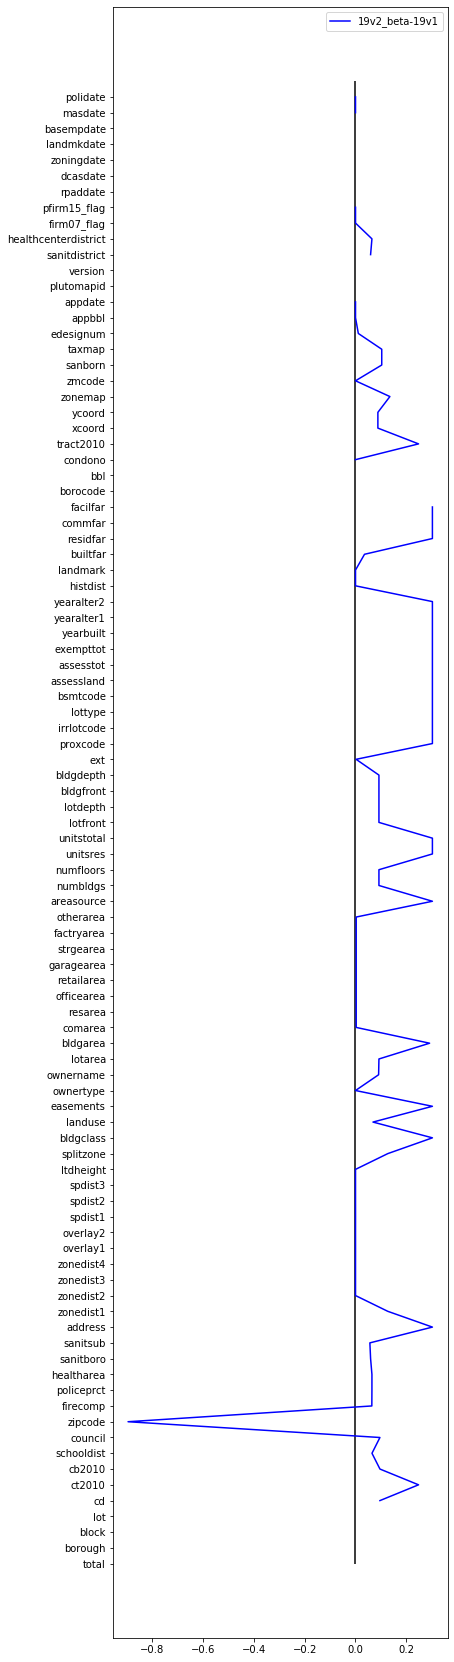

In [116]:
plt.figure(figsize=(6, 30))

difference1 = summary_pct.loc['19v2_beta',:]
num_col = len(summary_pct.columns)
plt.plot(difference1, range(num_col), label = '19v2_beta-19v1', color = 'blue')
plt.vlines(0, 0, num_col) #0 reference line

for i in range(num_col):
    if abs(difference1[i]) >= 10000:
        plt.text(x = difference1[i] , y = i - 0.15, s = '{}'.format(difference1[i]), size = 10, color = 'blue')
    else: 
        pass
    
plt.yticks(range(num_col), summary_pct.columns, rotation='horizontal')
# plt.title('19v1-18v2.1 Null 0 Counts Comparison')
plt.legend()
plt.show()